In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv(r"c:\SeoulBikeData.csv")
df.head()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),S0wfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1,1


In [73]:
df.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),S0wfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2.504110,0.950685,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,3.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,4.000000,1.000000,1.000000


In [55]:
y=df['Rented Bike Count']

In [56]:
x=df.loc[:,df.columns !='Rented Bike Count']

In [57]:
x

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),S0wfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,1,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,1,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,1,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,1,1


In [59]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [61]:
model=LinearRegression()

In [62]:
model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=model.predict(x_test)

In [64]:
print("coefficient : ",model.coef_)

print("intercept : ",model.intercept_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

coefficient :  [ 2.81418299e+01  2.25192078e+01 -8.93920978e+00  1.83446470e+01
 -3.41043024e-03  3.92855615e+00 -7.39897976e+01 -6.56642658e+01
  1.80812685e+01  1.10074081e+02  1.22119861e+02  9.19948128e+02]
intercept :  -662.0486472924313
Mean squared error: 180038.59
Coefficient of determination: 0.56


In [65]:
#equation
y(Rented Bike Count)=(2.81418299e+01(Hour) + 2.25192078e+01(Temperature(�C)) - 8.93920978e+00(Humidity(%)) + 1.83446470e+01(Wind speed (m/s)) 
   -3.41043024e-03(Visibility (10m)) + 3.92855615e+00(Dew point temperature(�C)) - 7.39897976e+01(Solar Radiation (MJ/m2)) 
   -6.56642658e+01(Rainfall(mm)) + 1.80812685e+01(S0wfall(cm)) +  1.10074081e+02(Seasons) + 1.22119861e+02(Holiday) 
   + 9.19948128e+02(Functioning Day) - 662.0486472924313)

#maximum no bike rented on Functioning day  
#if dew point increases rented bike count also increases rapidly 
#if huminity increases rented bike count decreases

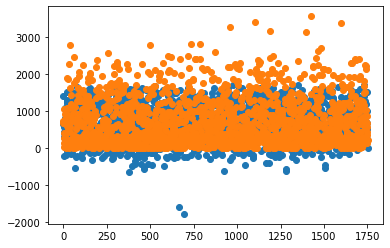

In [68]:
plt.scatter(range(0,len(y_pred)),y_pred)
#index of predict and predicted value
plt.scatter(range(0,len(y_test)),y_test)
#index of outcome and its value
plt.show()

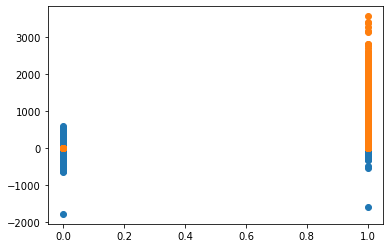

In [78]:
plt.scatter(x_test.iloc[:,11],y_pred)
#5-Functioning day and predicted value
plt.scatter(x_test.iloc[:,11],y_test)
# Functioning day and y value of data set
plt.show()

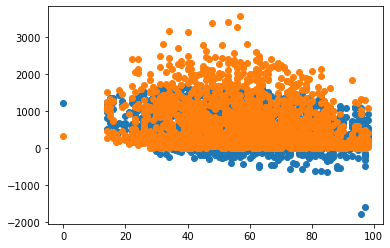

In [79]:
plt.scatter(x_test.iloc[:,2],y_pred)
#2(index)-Huminity and predicted value
plt.scatter(x_test.iloc[:,2],y_test)
# huminity and y value of data set
plt.show()